# Overcooked exam project

Overcooked is a **common-payoff** game that accounts for really **sparse reward**: indeed, it receives reward only when the task is completed (delivering a soup). We have then to exploit some intermediate rewards given by the completion of different subgoals.

Which are instead the intermediate and final rewards that the game gives at the completion of each subgoal?

In [ ]:
from mappo import *
from utils import *

overcooked = GeneralizedOvercooked(["cramped_room"])
rewards_dict = overcooked.cur_env.mdp.reward_shaping_params
rewards_dict.update({"SOUP_DELIVERED": 20})
for k, v in rewards_dict.items():
    print(f"{k}: {v}")

Computing MotionPlanner to be saved in C:\Users\follo\OneDrive\Desktop\uniBo\corsi\2nd year\AAS\overcooked_ai\src\overcooked_ai_py\data\planners\cramped_room_mp.pkl
It took 0.06899881362915039 seconds to create mp
PLACEMENT_IN_POT_REW: 3
DISH_PICKUP_REWARD: 3
SOUP_PICKUP_REWARD: 5
DISH_DISP_DISTANCE_REW: 0
POT_DISTANCE_REW: 0
SOUP_DISTANCE_REW: 0
SOUP_DELIVERED: 20


: 

Which are the **actions** that each agent can perform?
- 0: Up
- 1: Down
- 2: Right
- 3: Left
- 4: Stay
- 5: Interact (e.g., pick up, drop, chop, etc.)

In [ ]:
actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}

: 

## Some testing
Let's test the overcooked_ai framework using its most naive layout, _cramped_room_

Computing MotionPlanner to be saved in C:\Users\follo\OneDrive\Desktop\uniBo\corsi\2nd year\AAS\overcooked_ai\src\overcooked_ai_py\data\planners\cramped_room_mp.pkl
It took 0.06699275970458984 seconds to create mp


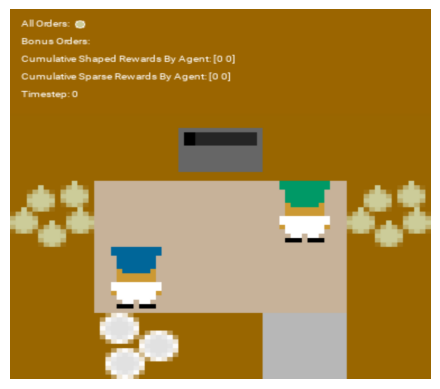

: 

In [ ]:
overcooked = GeneralizedOvercooked(["cramped_room"])
render_env(overcooked)

The environment object takes a tuple (or a list) of actions that each agent should perform.
e.g. actions = (1, 2) corresponds to:
- Agent 1 (the one with the blue hat) goes _Down_
- Agent 2 (the one with the green hat) goes _Right_

Observations:
 (array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
        2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1., -2.,  1.,  3.,  1.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
        0.,  0

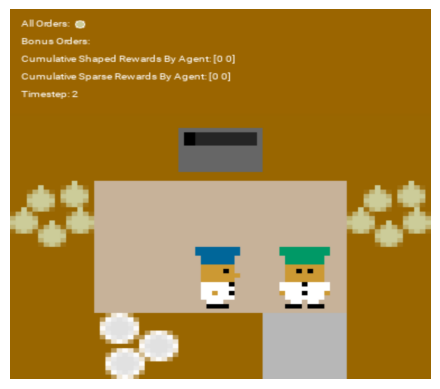


Final Overcooked state:
Players: ((2, 2) facing (1, 0) holding None, (3, 2) facing (0, 1) holding None), Objects: [], Bonus orders: [] All orders: [('onion', 'onion', 'onion')] Timestep: 2


: 

In [ ]:
state = overcooked.reset()
print("Observations:\n", state["both_agent_obs"])

other_agent_id = state["other_agent_env_idx"]
main_agent_id = 1 - other_agent_id
agents_ids = [main_agent_id, other_agent_id]    
print(f"Main agent ID: {main_agent_id}, Other agent ID: {other_agent_id}")

print(state["overcooked_state"])
for obj in state["overcooked_state"].objects:
    print(f"Object: {obj.name}, Position: {obj.position}, State: {obj.state}")

obs = overcooked.reset()
obs1 = obs["both_agent_obs"][0]
obs2 = obs["both_agent_obs"][1]

# We can use the action space directly, sampling from it 
print("Sampled action for agent 1:", overcooked.action_space.sample())
print("Sampled action for agent 2:", overcooked.action_space.sample())

# here we specify actions directly, to demonstrate the action space
action_1 = 1 # Down for agent 1
action_2 = 2 # Right for agent 2
actions = (action_1, action_2)
overcooked.step(actions)
#render_env(overcooked)

# now we can interact with the environment
action_1 = 5 # Interact
action_2 = 5 # Interact
actions = (action_1, action_2)
_, _, _, info = overcooked.step(actions)
render_env(overcooked)

# Check if agents have objects
for idx, agent in enumerate(overcooked.cur_env.base_env.state.players):
    if agent.has_object():
        print(f"Agent {idx + 1} has object: {agent.held_object.name}")

print("\nFinal Overcooked state:")
print(overcooked.cur_env.base_env.state)

⚠️ [ISSUE] Agents' indices change at every run!

#### Visualizing how agents gather rewards by completing (sub)goals


First onion on the pot (shaped reward: [0, 0])
{'agent_infos': [{}, {}], 'sparse_r_by_agent': [0, 0], 'shaped_r_by_agent': [0, 0], 'phi_s': None, 'phi_s_prime': None, 'policy_agent_idx': np.int64(1)}
Second onion on the pot
Third onion on the pot

Starting to cook the soup...


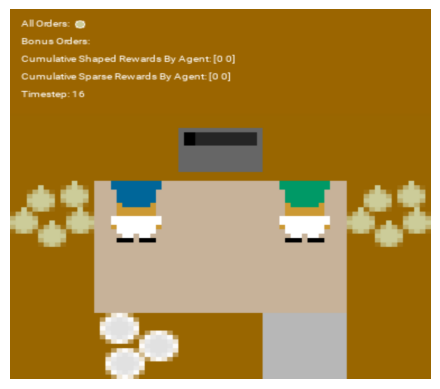

Prepare to take the soup


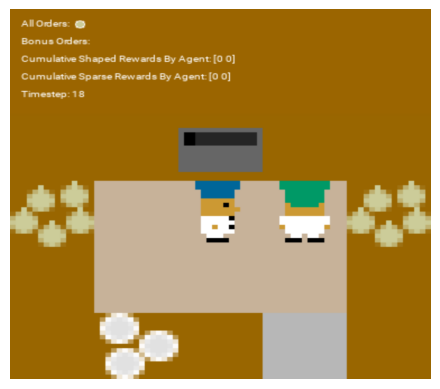

Delivering the soup...


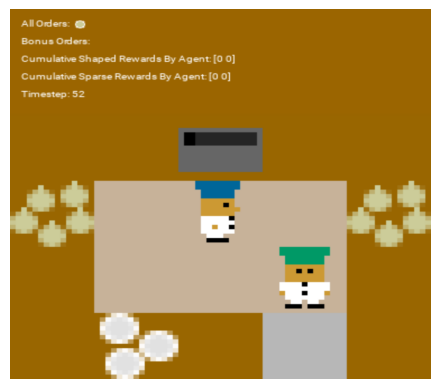

Sparse reward: [0, 0], shaped_reward: [0, 0], done: False
Team reward: 0


: 

In [ ]:
env = GeneralizedOvercooked(["cramped_room"])

# here we specify actions directly, to demonstrate the action space
_, sparse_reward, done, info = env.step([1, 2])

# now we can interact with the environment
_, sparse_reward, done, info = env.step([5, 5])

# Check if agents have objects
for idx, agent in enumerate(env.cur_env.base_env.state.players):
    if agent.has_object():
        print(f"Agent {idx + 1} has object: {agent.held_object.name}")

# put the first onion
env.step([0, 3])
env.step([4, 0])
_, _, _, info = env.step([4, 5])
print(f"\nFirst onion on the pot (shaped reward: {info['shaped_r_by_agent']})")
print(info)

# second onion
env.step([4, 2])
env.step([4, 5])
env.step([4, 3])
env.step([4, 0])
env.step([4, 5])
print("Second onion on the pot")

# third onion
env.step([4, 2])
env.step([4, 5])
env.step([4, 3])
env.step([4, 0])
env.step([4, 5])
print("Third onion on the pot")

# start cooking
print("\nStarting to cook the soup...")
env.step([4, 5])
render_env(env)
cooking_time = 0

# prepare to take the soup
env.step([2, 2])
env.step([0, 5])
print("Prepare to take the soup")
render_env(env)

# waiting until cooking isn't finished
for _ in range(30):
    cooking_time += 1
    _, _, _, info = env.step([5, 4])
    if info["shaped_r_by_agent"][0] > 0:
        # viz the agent with the soup
        print(f"Soup picked! Cooking time: {cooking_time} timesteps")
        print(f"shaped_reward: {info['shaped_r_by_agent']}")
        render_env(env)

# deliver soup
env.step([1, 4])
env.step([2, 4])
env.step([1, 4])
_, total_sp_reward, done, info = env.step([5, 4])
print("Delivering the soup...")
render_env(env)
print(f"Sparse reward: {info['sparse_r_by_agent']}, shaped_reward: {info['shaped_r_by_agent']}, done: {done}")
print(f"Team reward: {total_sp_reward}")


## Hands-on

### Typical structure of a Gym program

Episode 1
Step 1
Actions: ['Right', 'Up'], Sparse reward: 0, Done: False


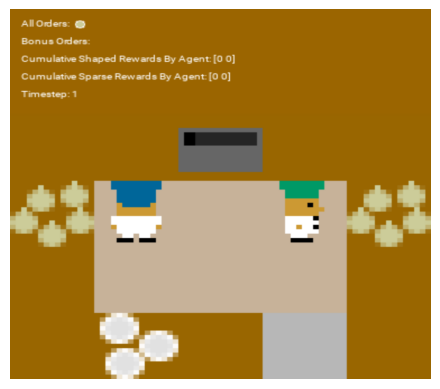

Step 2
Actions: ['Right', 'Stay'], Sparse reward: 0, Done: False


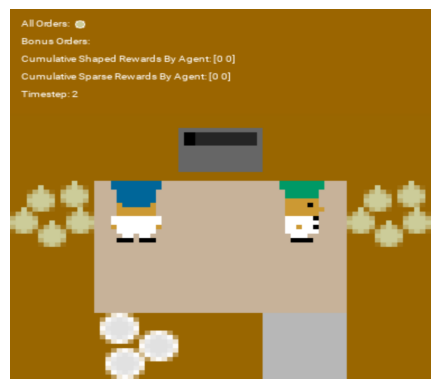

Step 3
Actions: ['Down', 'Right'], Sparse reward: 0, Done: False


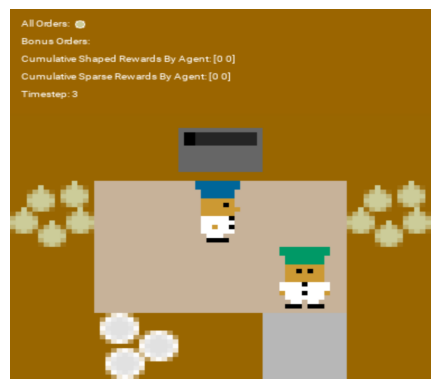

Step 4
Actions: ['Interact', 'Stay'], Sparse reward: 0, Done: False


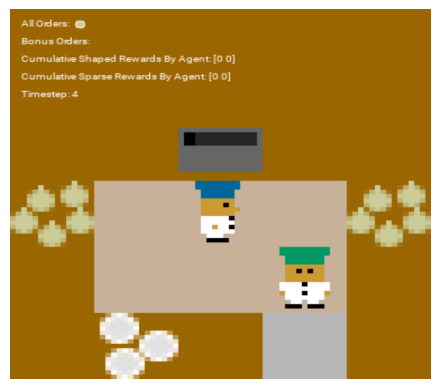

Step 5
Actions: ['Left', 'Down'], Sparse reward: 0, Done: False


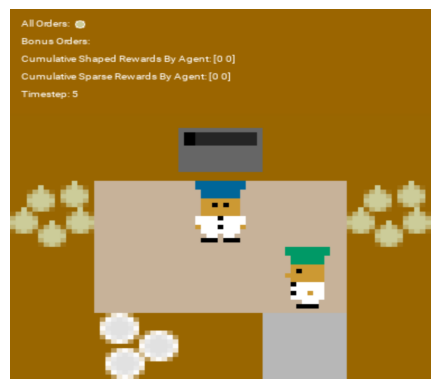

: 

In [ ]:
episodes = 1
steps = 5
env = GeneralizedOvercooked(["cramped_room"])

# Run multiple episodes to demonstrate the environment
for episode in range(episodes):
    print(f"Episode {episode + 1}")
    obs = env.reset()
    for step in range(steps):
        print(f"Step {step + 1}")
        action_1 = env.action_space.sample()  # Sample action for agent 1
        action_2 = env.action_space.sample()  # Sample action for agent 2
        actions = (action_1, action_2)
        nex_state, reward, done, info = env.step(actions)
        print(f"Actions: {[actions_dict[action_idx] for action_idx in actions]}, Sparse reward: {reward}, Done: {done}")
        render_env(env)
        if (done):	
            print("Episode finished")
            env.reset()
            break	

### PPO for Multi-agent environments

#### Our approach: **MAPPO** with **CTDE** (Centralized Training, Decentralized Execution)

- **Execution is decentralized**: each agent acts independently based on its own local observation.

- **Training is centralized**: we use a _shared actor_ and _shared critic_. The critic receives global information by taking _joint_ observations from all agents.

Before fully embracing this paradigm, we begin with a **naive hybrid** version of the algorithm that combines centralized and decentralized training. In this initial setup:
- Both agents share the same value network, but receive distinct observations.
- The actor network operates only on the local observation vector, without incorporating any additional contextual information (such as agent roles).
- We train exclusively on the simplest layout, _Cramped Room_, which may lead the model to overfit to this specific environment.

##### MAPPO **advantages**:
* One of the key advantages of MAPPO is its ability to address the challenges associated with multi-agent learning, such as non-stationarity and credit assignment. Non-stationarity refers to the dynamic nature of the environment, where the optimal policy for one agent may change based on the actions of other agents. MAPPO tackles this issue by employing a centralized critic that estimates the value function for the entire system, providing a stable learning signal for all agents.

* Credit assignment, on the other hand, involves determining the individual contributions of each agent to the overall performance of the system. MAPPO addresses this challenge by utilizing a decentralized actor architecture, where each agent learns its own policy based on its local observations and the shared critic. This approach allows for efficient learning and scalability, as the computational complexity grows linearly with the number of agents.

##### Things to be **aware** of:

**Indexing issue:**
Agent indices are not persistent identities. At every reset, Overcooked randomizes spawn locations, so “agent 0” in one episode might start in the top-left spawn, but in the next episode the same slot could correspond to a completely different starting position.

We have two approaches to handle this:
1. *Symmetric policies*: 
    - Agents share parameters and are fully symmetric.
    - No identity signal is given.
    - Each agent just acts on its local observation.
    - Coordination emerges implicitly, not via fixed roles.

2. *Agent indexing / role embeddings*:
    - Give each agent an index embedding (one-hot or learned vector) as extra input alongside its observation.
    - Or condition on a role vector (e.g., “deliverer,” “chopper”) that can be learned or assigned.
    - This way, the network knows which agent it is controlling, even if the spawn positions shuffle.

**Critic output:**
Choosing the number of outputs for the Critic is an important design decision. Using a *single-headed* Critic is a simpler, more naive approach with fewer parameters, but it has a key limitation: it does not explicitly model each agent’s contribution. As a result, the Critic blends predictions across agents, which may prevent it from providing focused value estimates for individual behaviors. In contrast, a *multi-headed* Critic allows each agent to have its own output, enabling more precise credit assignment and potentially improving learning in multi-agent environments. This is similar in spirit to a *role embedding*, where you explicitly provide the agent’s identity or role as input to the network, guiding it to differentiate behaviors.

In [1]:
import importlib, utils, mappo
importlib.reload(utils)
importlib.reload(mappo)
from utils import *
from mappo import *

# Define actions
actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"} 
actions = [a for a in actions_dict.keys()]

#### Useful functions

In [2]:
# The pre-defined params
def init_params():
    obs_dim = 96
    act_dim = len(actions)
    actor_units = [128, 128, 128]
    critic_units = [256, 128, 128]
    num_agents = 2
    env_params = {
        "obs_dim": obs_dim,
        "act_dim": act_dim,
        "actor_units": actor_units,
        "critic_units": critic_units,
        "num_agents": num_agents,
    }
    return env_params

In [4]:
# Create the env. with the chosen layouts and start the learning process
def start_learning(env_names, MAPPO_class, n_epochs, ep_rollout, n_rollouts, rew_shaping="none"):
    env = GeneralizedOvercooked(env_names)
    env_params = init_params()

    mappo = MAPPO_class(env=env, env_params=env_params)
    mappo.train_loop(epochs=n_epochs, ep_per_rollout=ep_rollout,
                     num_rollouts=n_rollouts, rew_shaping = rew_shaping) # atm, 1 rollout = 2.30 minutes

    return mappo

In [3]:
# Test the model at inference time
def testing(env_names, actor, episodes, sampling_type = "categorical"):
    env = GeneralizedOvercooked(env_names)
    steps = env.cur_env.base_env.horizon # 400

    all_episode_rewards = []

    for ep in range(episodes):
        obs = env.reset()
        ep_cum_rew = 0

        for _ in range(steps):
            obs = obs["both_agent_obs"]
            obs_A1 = obs[0]
            obs_A2 = obs[1]

            # Get unbatched probabilities
            action_probs_A1 = actor.predict(np.array([obs_A1]), verbose=0)[0]  # shape (N,)
            action_probs_A2 = actor.predict(np.array([obs_A2]), verbose=0)[0]

            if sampling_type == "categorical":
                # Re-wrap for batch input to categorical sampling
                action_A1 = tf.random.categorical(tf.math.log([action_probs_A1]), 1)[0, 0].numpy()
                action_A2 = tf.random.categorical(tf.math.log([action_probs_A2]), 1)[0, 0].numpy()
            else:
                # Epsilon-greedy sampling
                action_A1 = epsilon_greedy(action_probs_A1)
                action_A2 = epsilon_greedy(action_probs_A2)

            next_obs, sparse_reward, done, info = env.step((action_A1, action_A2))
            shaped_reward = info["shaped_r_by_agent"]
            ep_cum_rew += sparse_reward + np.sum(shaped_reward)

            obs = next_obs
            if done:
                break     

        all_episode_rewards.append(ep_cum_rew)
        print(f"Episode {ep+1}: Reward = {ep_cum_rew}")

    # Final summary
    mean_reward = np.mean(all_episode_rewards)
    std_reward = np.std(all_episode_rewards)

    return mean_reward, std_reward

#### First **run** in *cramped_room*

In [ ]:
mappo = start_learning(["cramped_room"], MAPPO_class=MAPPO, n_epochs=6, ep_rollout=8, n_rollouts=40, rew_shaping="linear")

▶ Starting learning process!
PHASE 1️⃣: cramped room

Rollout: 1
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 5.500

Rollout: 2
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 7.500

Rollout: 3
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 5.825

Rollout: 4
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 7.900

Rollout: 5
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 10.225

Rollout: 6
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 7.300

Rollout: 7
 📦 Gathering transitions...
  🍛 Delivered dishes: 1
 📖 Learning...
 ➗ Average return: 18.750

Rollout: 8
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 22.575

Rollout: 9
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 19.525

Rollou

: 

In [ ]:
rollout_with_gif(env_name="cramped_room", actor=mappo.actor_model)

GIF saved as episode.gif


: 

#### Quick policy / actor test
Does the actor actually learn a good behavior? Let's find out that analyzing a situation where the most rewarding action for the green agent is to 'Interact' with the environment, in order to pick an onion [+3 Reward].

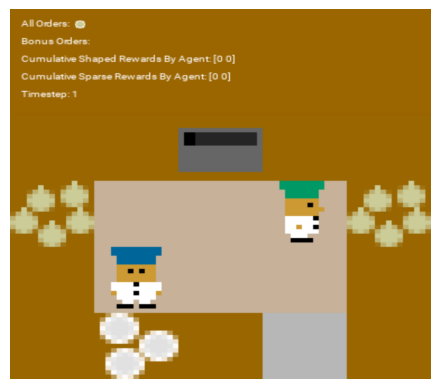

Printing action probs. for agent 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Action: Up, Prob: 0.0014
Action: Down, Prob: 0.0001
Action: Right, Prob: 0.0024
Action: Left, Prob: 0.0059
Action: Stay, Prob: 0.0000
Action: Interact, Prob: 0.9902


: 

In [ ]:
env = GeneralizedOvercooked(["cramped_room"])

obs, _, _, info = env.step((1, 2))
render_env(env)
obs = obs["both_agent_obs"]
obs_A1 = obs[0]
obs_A2 = obs[1]
print("Printing action probs. for agent 2:")
action_probs = mappo.actor_model.predict(np.array([obs_A2]))
for action_idx, p in zip(actions, action_probs[0]):
    print(f"Action: {actions_dict[action_idx]}, Prob: {p:.4f}")

> As we can see, the answer to the previous question is clearly yes. The policy assigns a probability of *0.99* to the 'Interact' action, making the choice essentially deterministic. This indicates that the learned policy has correctly identified interacting as the optimal action in this state, since it directly yields a reward.

#### Saving / loading models

In [ ]:
save_models(mappo, "actor_model_cramped_2", "critic_model_cramped_2")

In [24]:
actor_model, critic_model = load_models("actor_model_ml", "critic_model_ml")

#### **Testing** the model at **inference** time


##### Testing on the training layout, that is _cramped_room_
We want to get at least *50* as mean reward across multiple episodes.

In [ ]:
# Testing the model averaging results over N episodes
n_episodes = 10
mean_reward, std_reward = testing(["cramped_room"], actor = mappo.actor_model, n_episodes = 10)
print(f"\nEvaluation over {n_episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 299
Episode 2: Reward = 299
Episode 3: Reward = 339
Episode 4: Reward = 293
Episode 5: Reward = 313
Episode 6: Reward = 308
Episode 7: Reward = 302
Episode 8: Reward = 333
Episode 9: Reward = 308
Episode 10: Reward = 333

Evaluation over 10 episodes
Mean Total Reward: 312.70
Std Dev: 15.61


: 

> As we can see, the model behaves really well on *cramped_room*, our most naive layout. What about its generalization abilities on different layouts?

##### Testing on an **unseen** layout
To analyze generalization abilities, let's try a more complex layout, named *asymmetric advantages*, that introduce asymmetric roles.

In [ ]:
# Testing the model averaging results over N episodes
n_episodes = 5
mean_reward, std_reward = testing("asymmetric_advantages", actor = mappo.actor_model, n_episodes = 5)
print(f"\nEvaluation over {n_episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 0
Episode 2: Reward = 0
Episode 3: Reward = 0
Episode 4: Reward = 0
Episode 5: Reward = 0

Evaluation over 10 episodes
Mean Total Reward: 0.00
Std Dev: 0.00


: 

>It achieves a mean reward of *zero* on a different layout, that is *asymmetric advantanges*, which requires quite different patterns of action with respect to *cramped_room*. 

>>This is a clear sign of **overfitting!** The model learns the behavioral patterns required by the *cramped_room* layout so well that it is nearly optimal. 

#### **Solution**: Curriculum learning

Since our model overfits on *cramped_room*, we're going to **fine-tune** it on tougher layouts, trying to increase its generalization abilities. In other words, we started from an easy task, learning a decent policy. Then we want to transfer that policy to a harder task, and continuing learning.

The other two layouts we'll try, in a **interleaved** way, are *asymmetric_advantages* and *bottleneck*.

asymmetric_advantages 🔽


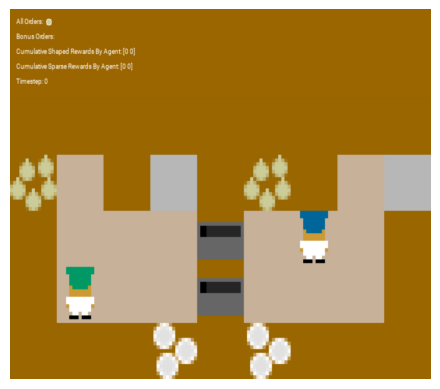

bottleneck 🔽


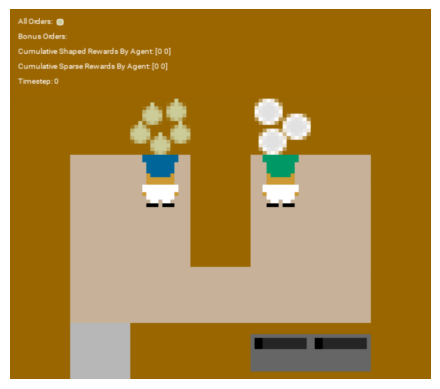

In [4]:
ml_layouts = ["asymmetric_advantages", "bottleneck"]
test_envs = GeneralizedOvercooked(ml_layouts)
for layout, env in zip(ml_layouts, test_envs.envs):
    print(f"{layout} 🔽")
    render_env(env)

In [ ]:
layout_list = ["cramped_room", "asymmetric_advantages", "bottleneck"]
mappo_ml = start_learning(env_names=layout_list, MAPPO_class=MAPPO, n_epochs=6, ep_rollout=8, n_rollouts=50, rew_shaping="linear")

▶ Starting learning process!
PHASE 1️⃣: cramped room

Rollout: 1
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 1.12

Rollout: 2
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 2.88

Rollout: 3
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 6.37

Rollout: 4
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 3.75

Rollout: 5
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 5.99

Rollout: 6
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 1.12

Rollout: 7
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 6.73

Rollout: 8
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 11.09

Rollout: 9
 📦 Gathering transitions...
  🍛 Delivered dishes: 0
 📖 Learning...
 ➗ Average return: 8.97

Rollout: 10
 📦 Gat

: 

##### The training average return
Let's analyze in a more concise way the average return per rollout obtained during the training, for each layout.

In [ ]:
print("Avg return per rollout:")
for layout, returns in mappo_ml.avg_return_per_rollout.items():
    print(f"Layout: {layout}, Avg Returns: {np.mean(returns)}")

##### Testing at inference time on multiple layouts

In [12]:
# Testing the model averaging results over N episodes
n_episodes = 5
mean_reward, std_reward = testing(["asymmetric_advantages"], actor = mappo_ml.actor_model, episodes = n_episodes)
print(f"\nEvaluation over {n_episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 177
Episode 2: Reward = 175
Episode 3: Reward = 162
Episode 4: Reward = 116
Episode 5: Reward = 201

Evaluation over 5 episodes
Mean Total Reward: 166.20
Std Dev: 28.08


In [13]:
# Testing the model averaging results over N episodes
n_episodes = 5
mean_reward, std_reward = testing(["bottleneck"], actor = mappo_ml.actor_model, episodes = n_episodes)
print(f"\nEvaluation over {n_episodes} episodes")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 11
Episode 2: Reward = 12
Episode 3: Reward = 19
Episode 4: Reward = 22
Episode 5: Reward = 14

Evaluation over 5 episodes
Mean Total Reward: 15.60
Std Dev: 4.22


##### Testing on an **unseen** layout: *coordination_ring*

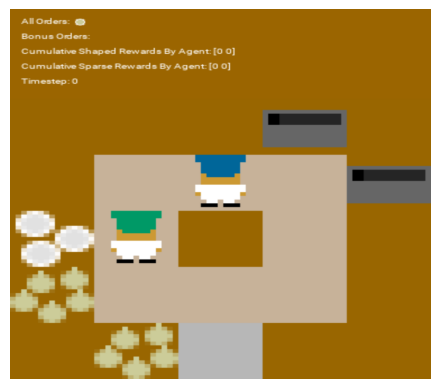

In [27]:
test_env = GeneralizedOvercooked(["coordination_ring"])
render_env(test_env)

In [26]:
# Testing the model averaging results over N episodes
n_episodes = 2
layout = "coordination_ring"
mean_reward, std_reward = testing([layout], actor = mappo_ml.actor_model, episodes = n_episodes)
print(f"\nEvaluation over {n_episodes} episodes on {layout}")
print(f"Mean Total Reward: {mean_reward:.2f}")
print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 3
Episode 2: Reward = 0

Evaluation over 2 episodes on coordination_ring
Mean Total Reward: 1.50
Std Dev: 1.50


> As we can see, the **generalization** abilities are still **poor**. Here, in a layout where coordination is essential, the two agents are barely able to pick an onion over 400 steps.  

##### Saving GIFs 

In [ ]:
rollout_with_gif(env_name="bottleneck", gif_path = "episode.gif", actor=mappo_ml.actor_model)

GIF saved as episode.gif


##### Save models

In [ ]:
save_models(mappo_ml, "actor_model_ml", "critic_model_ml")

In [8]:
actor_model, critic_model = load_models(actor_name="actor_model_ml", critic_name="critic_model_ml")

#### **Solution 2**: Multi-headed critic
Let's try another architectural change; as said before, a *multi-headed* Critic allows each agent to have its own output, enabling more precise credit assignment and potentially improving learning in multi-agent environments. This is similar in spirit to a *role embedding*, where you explicitly provide the agent’s identity or role as input to the network, guiding it to differentiate behaviors. In this first phase, we will use the same training recipe of before, to compare performances.

In [9]:
import importlib, utils, mappo
importlib.reload(utils)
importlib.reload(mappo)
from utils import *
from mappo import *

actions_dict = {0: "Up", 1: "Down", 2: "Right", 3: "Left", 4: "Stay", 5: "Interact"}
actions = [a for a in actions_dict.keys()]

In [10]:
# 0) init params
env_params = init_params()

# 1) build env with expanded layouts
layouts = ["cramped_room", "asymmetric_advantages", "bottleneck", "counter_circuit", "coordination_ring"]
env = GeneralizedOvercooked(layouts, horizon=400)

# 2) initialize MAPPO
mappo_mh = MAPPO_mh(env=env, env_params=env_params)

# 3) training loop
mappo_mh.train_loop(epochs=6, ep_per_rollout=8, num_rollouts=170, rew_shaping = "linear")

▶ Starting learning process!
PHASE 1️⃣: cramped room

Rollout: 1
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 0, 0, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 6.88

Rollout: 2
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 0, 0, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 11.12

Rollout: 3
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 0, 0, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 13.74

Rollout: 4
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 0, 0, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 15.23

Rollout: 5
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 0, 1, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 22.46

Rollout: 6
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 1, 0, 0, 0, 0, 0, 0]
 📖 Learning...
 ➗ Average return: 24.82

Rollout: 7
 📦 Gathering transitions...
  🍛 Delivered dishes per-ep: [0, 1, 0, 0, 0, 1, 0, 0]
 📖 Learning...
 ➗ Average return: 27.55

Rollout: 

In [12]:
print("Avg return per rollout:")
for layout, returns in mappo_mh.avg_return_per_rollout.items():
    print(f"Layout: {layout}, Avg Returns: {np.mean(returns)}")

Avg return per rollout:
Layout: cramped_room, Avg Returns: 132.2496381547716
Layout: asymmetric_advantages, Avg Returns: 42.31730862764212
Layout: bottleneck, Avg Returns: 10.419891744852066
Layout: counter_circuit, Avg Returns: 0.3347437486052513
Layout: coordination_ring, Avg Returns: 19.69246552113829


In [13]:
print("Mean deliveries per layout of last rollout:")
for layout, returns in mappo_mh.deliveries_per_layout.items():
    print(f"Layout: {layout}, Deliveries: {np.mean(returns)}")

Mean deliveries per layout of last rollout:
Layout: cramped_room, Deliveries: 3.2666666666666666
Layout: asymmetric_advantages, Deliveries: 0.33653846153846156
Layout: bottleneck, Deliveries: 0.0
Layout: counter_circuit, Deliveries: 0.0
Layout: coordination_ring, Deliveries: 0.09913793103448276


In [15]:
# Testing the model averaging results over N episodes
n_episodes = 3
layout_list = ["cramped_room"]
for layout in layout_list:
    mean_reward, std_reward = testing([layout], actor = mappo_mh.actor_model, episodes = n_episodes)
    print(f"\nEvaluation over {n_episodes} episodes on {layout}")
    print(f"Mean Total Reward: {mean_reward:.2f}")
    print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 117
Episode 2: Reward = 9
Episode 3: Reward = 49

Evaluation over 3 episodes on cramped_room
Mean Total Reward: 58.33
Std Dev: 44.58


In [14]:
# Testing the model averaging results over N episodes
n_episodes = 3
layout_list = ["forced_coordination"]
for layout in layout_list:
    mean_reward, std_reward = testing([layout], actor = mappo_mh.actor_model, episodes = n_episodes)
    print(f"\nEvaluation over {n_episodes} episodes on {layout}")
    print(f"Mean Total Reward: {mean_reward:.2f}")
    print(f"Std Dev: {std_reward:.2f}")

Episode 1: Reward = 3
Episode 2: Reward = 0
Episode 3: Reward = 0

Evaluation over 3 episodes on forced_coordination
Mean Total Reward: 1.00
Std Dev: 1.41


In [18]:
rollout_with_gif(env_name="cramped_room", gif_path = "cr.gif", actor= mappo_mh.actor_model)

GIF saved as cr.gif


In [11]:
save_models(mappo_mh, "actor_model_mh_full", "critic_model_mh_full")

In [ ]:
actor_model, critic_model = load_models(actor_name="actor_model_mh", critic_name="critic_model_mh")

##### Fine-tuning

In [50]:
import importlib, utils, mappo
importlib.reload(utils)
importlib.reload(mappo)
from utils import *
from mappo import *

In [52]:
# 0) init params
env_params = init_params()

# 1) load saved models
actor_model_ft, critic_model_ft = load_models(actor_name="actor_model_mh", critic_name="critic_model_mh")

# 2) build env with expanded layouts
layouts = ["cramped_room", "asymmetric_advantages", "bottleneck", "counter_circuit", "coordination_ring"]
env = GeneralizedOvercooked(layouts, horizon=400)

# 3) initialize MAPPO (fine_tune mode) with same architecture as saved models
mappo_mh_ft = MAPPO_mh(env=env, env_params=env_params)

# 4) set weights
mappo_mh_ft.actor_model.set_weights(actor_model_ft.get_weights())
mappo_mh_ft.critic_model.set_weights(critic_model_ft.get_weights())

# 5) adjust hyperparams
mappo_mh_ft.actor_optimizer.learning_rate = 2e-4
mappo_mh_ft.critic_optimizer.learning_rate = 1e-4

# 6) training loop
mappo_mh_ft.train_loop(epochs=6, ep_per_rollout=8, num_rollouts=20, rew_shaping = "linear")

▶ Starting learning process!
PHASE 1️⃣: cramped room

Rollout: 1
 📦 Gathering transitions...
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[3, 0]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[3, 0]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[5, 0]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[3, 0]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[0, 3]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[0, 5]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[0, 3]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[0, 5]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[0, 3]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[5, 0]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[0, 3]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[5, 0]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[3, 0]
     Sparse: 0, Total shaped: 5, Team: 5.0, shaped:[0, 5]
     Sparse: 0, Total shaped: 3, Team: 3.0, shaped:[0, 3]
     Sparse: 0, Total shaped: 3, Team

In [32]:
print("Mean deliveries per layout of last rollout:")
for layout, returns in mappo_mh_ft.deliveries_per_layout.items():
    print(f"Layout: {layout}, Deliveries: {np.mean(returns)}")

Mean deliveries per layout of last rollout:
Layout: cramped_room, Deliveries: 2.90625
Layout: asymmetric_advantages, Deliveries: 0.0
Layout: bottleneck, Deliveries: 0.0
Layout: counter_circuit, Deliveries: 0.0
Layout: coordination_ring, Deliveries: 0.0


In [34]:
print("Avg return per rollout:")
for layout, returns in mappo_mh_ft.avg_return_per_rollout.items():
    print(f"Layout: {layout}, Avg Returns: {np.mean(returns)}")

Avg return per rollout:
Layout: cramped_room, Avg Returns: 132.02706241607666
Layout: asymmetric_advantages, Avg Returns: 7.162400078773499
Layout: bottleneck, Avg Returns: 0.49014999270439147
Layout: counter_circuit, Avg Returns: 0.3354027685191896
Layout: coordination_ring, Avg Returns: 6.08799996599555


In [19]:
save_models(mappo_mh, "actor_model_mh_ft", "critic_model_mh_ft")

In [28]:
actor_model_ft, critic_model_ft = load_models(actor_name="actor_model_mh_ft", critic_name="critic_model_mh_ft")

In [ ]:
# Testing the model averaging results over N episodes
n_episodes = 3
layout_list = ["asymmetric_advantages", "bottleneck", "cramped_room"]
for layout in layout_list:
    mean_reward, std_reward = testing([layout], actor = actor_model_ft, episodes = n_episodes)
    print(f"\nEvaluation over {n_episodes} episodes on {layout}")
    print(f"Mean Total Reward: {mean_reward:.2f}")
    print(f"Std Dev: {std_reward:.2f}\n\n")

Episode 1: Reward = 155
Episode 2: Reward = 113
Episode 3: Reward = 74

Evaluation over 3 episodes
Mean Total Reward: 114.00
Std Dev: 33.08
Episode 1: Reward = 36
Episode 2: Reward = 44
Episode 3: Reward = 38

Evaluation over 3 episodes
Mean Total Reward: 39.33
Std Dev: 3.40
Episode 1: Reward = 284
Episode 2: Reward = 219
Episode 3: Reward = 250

Evaluation over 3 episodes
Mean Total Reward: 251.00
Std Dev: 26.55


#### **Solution 3**: Population-based learning
In this other iteration of our experimentation we'll try to insert different types of agents, sampling from a pool of agents, the so-called *partners*. Our aim is to provide several training partners, each covering a spectrum of different coordination styles, such that our PPO agent doesn’t overfit to a single teammate. 

Up to now we've trained our agents only with the *self-play* strategy, that guarantees a certain degree of optimality but it lacks in generalization abilities.